#  Innomatics Hackathon

## Vivek Molleti

In [63]:
import pandas as pd
import numpy as np


In [2]:
movies = pd.read_csv("movies.csv")

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
movies.shape

(9742, 3)

In [5]:
ratings = pd.read_csv("ratings.csv")

In [6]:
ratings.shape

(100836, 4)

In [9]:
len(ratings['userId'].unique())

610

In [12]:
ratings["movieId"].mode()

0    356
Name: movieId, dtype: int64

In [65]:
movies[movies['movieId']==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [15]:
tags = pd.read_csv("tags.csv")

In [16]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [17]:
movie_id = 2571

In [18]:
tags_real = tags.loc[tags["movieId"] == movie_id] 

In [19]:
tags_real

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [20]:
movie_title = "Terminator 2: Judgment Day (1991)"
movie_id_ter = movies.loc[movies["title"] == movie_title]

In [22]:
movie_id_ter

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [29]:
avg_ratings = ratings[ratings["movieId"]==589]

In [30]:
avg_ratings

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012
...,...,...,...,...
97461,606,589,3.5,1171325855
98514,607,589,4.0,963078960
98786,608,589,3.0,1117415154
99519,609,589,3.0,847220990


In [31]:
avg_ratings["rating"].mean()

3.970982142857143

In [32]:
movie_title = "Fight Club (1999)"
movie_id_ter = movies.loc[movies["title"] == movie_title]

In [33]:
movie_id_ter

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [34]:
avg_ratings = ratings[ratings["movieId"]==2959]

In [35]:
avg_ratings

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


In [36]:
import matplotlib.pyplot as plt

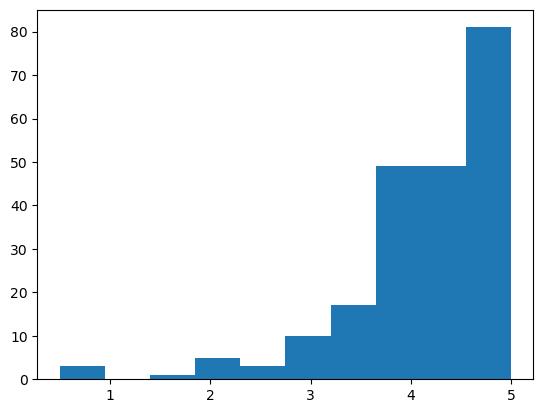

In [42]:
plt.hist(avg_ratings["rating"])
plt.show()

In [46]:
grouped_ratings = ratings.groupby('movieId').agg(rating_count=('rating', 'count'),rating_mean=('rating', 'mean')).reset_index()

In [47]:
grouped_ratings

,movieId,rating_count,rating_mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [48]:
movies_with_ratings = pd.merge(grouped_ratings, movies, on='movieId')

In [49]:
movies_with_ratings

,movieId,rating_count,rating_mean,title,genres
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,4,7,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,49,3.071429,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9719,193581,1,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9720,193583,1,3.500000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9721,193585,1,3.500000,Flint (2017),Drama
9722,193587,1,3.500000,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [50]:
filter_movies = movies_with_ratings[movies_with_ratings["rating_count"]>50]

In [51]:
filter_movies

,movieId,rating_count,rating_mean,title,genres
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
5,6,102,3.946078,Heat (1995),Action|Crime|Thriller
6,7,54,3.185185,Sabrina (1995),Comedy|Romance
...,...,...,...,...,...
8287,106782,54,3.916667,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
8354,109374,52,3.778846,"Grand Budapest Hotel, The (2014)",Comedy|Drama
8358,109487,73,3.993151,Interstellar (2014),Sci-Fi|IMAX
8457,112852,59,4.050847,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi


In [55]:
sorted_filter_ratings = filter_movies.sort_values(by="rating_count", ascending=False)

In [56]:
sorted_filter_ratings.head(10)

,movieId,rating_count,rating_mean,title,genres
314,356,329,4.164134,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,4.197068,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,4.161290,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller
224,260,251,4.231076,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
418,480,238,3.750000,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
97,110,237,4.031646,Braveheart (1995),Action|Drama|War
507,589,224,3.970982,Terminator 2: Judgment Day (1991),Action|Sci-Fi
461,527,220,4.225000,Schindler's List (1993),Drama|War


In [62]:
sorted_filter_ratings[sorted_filter_ratings['genres'].str.contains("Sci-Fi", case=False, na=False)]

,movieId,rating_count,rating_mean,title,genres
1938,2571,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller
224,260,251,4.231076,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
418,480,238,3.750000,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
507,589,224,3.970982,Terminator 2: Judgment Day (1991),Action|Sci-Fi
897,1196,211,4.215640,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
...,...,...,...,...,...
8673,122904,54,3.833333,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi
2028,2701,53,2.207547,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western
144,172,53,2.679245,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller
559,673,53,2.707547,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...


In [61]:
sorted_filter_ratings["genres"].describe()

count        436
unique       201
top       Comedy
freq          24
Name: genres, dtype: object